# **Hyperparameter Tuning**
# ⛳

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **PREPARE DATA**

In [37]:
import pandas as pd
out_df=pd.read_csv("/content/combined_otu_data.tsv", sep='\t')
out_df

,name,taxonomy_id,taxonomy_lvl,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,2057,S,3232092,0.11391,383411,0.01311,63773,0.00160,204219,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,151,S,851026,0.02999,34049,0.00116,17527,0.00044,51546,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,2098,S,631604,0.02226,195250,0.00668,53197,0.00134,4002970,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,104,S,499300,0.01760,117253,0.00401,14670,0.00037,85542,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,546,S,123744,0.00436,27246,0.00093,8643,0.00022,170255,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,3304,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,2194,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,58,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,1077,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [38]:
rmv_col=["taxonomy_id",	"taxonomy_lvl"]
imp_col=out_df.drop(rmv_col, axis=1)
imp_col

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [39]:
imp_col.index=out_df['name'].values
imp_col # makes the row labels (index) of imp_col equal to the values in the name column of out_df.

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
Bacteroides xylanisolvens,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
Bacteroides finegoldii,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
Bacteroides ovatus,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
Bacteroides sp902362375,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
Bacteroides nordii,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Helicobacter pylori_BU,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Methanobacterium sp000499765,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Campylobacter fetus,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [40]:
num_columns =[col for col in imp_col.columns if col.endswith('_num')]
brack_df = imp_col[num_columns]
brack_df

,SRR32732804.bracken.out_num,SRR32732805.bracken.out_num,SRR32732806.bracken.out_num,SRR32732807.bracken.out_num,SRR32732808.bracken.out_num,SRR32732809.bracken.out_num,SRR32732810.bracken.out_num,SRR32732811.bracken.out_num,SRR32732813.bracken.out_num,SRR32732814.bracken.out_num,...,SRR32733691.bracken.out_num,SRR32733692.bracken.out_num,SRR32733693.bracken.out_num,SRR32733694.bracken.out_num,SRR32733695.bracken.out_num,SRR32733696.bracken.out_num,SRR32733697.bracken.out_num,SRR32733698.bracken.out_num,SRR32733699.bracken.out_num,SRR32733700.bracken.out_num
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
brack_df.columns = brack_df.columns.str.extract(r'([^\.]+)\.bracken\.out_num')[0]
brack_df # to remove " bracken.out_num " extension----> to clean column name

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
brack_df.index = out_df['name'].values
brack_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
brack_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
import pandas as pd

# Assume brack_num_df is your DataFrame
# Example: brack_num_df = pd.read_csv('your_file.csv', index_col=0)

# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_df > 0).astype(int)#Creates a Boolean DataFrame (True if value > 0, False otherwise). Converts True → 1 and False → 0
#
# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)

# Step 3: Filter species with prevalence
threshold = 0.9
selected_species = prevalence[prevalence > threshold].index

# Step 4: Filter the original DataFrame to include only selected species
filtered_df = brack_df.loc[selected_species]

# Step 5: Output the filtered table
print(f"Filtered table for species with prevalence > {threshold}:")
print(filtered_df)

# Optionally, save the filtered table to a CSV file
# filtered_df.to_csv('filtered_species_prevalence_above_10_percent.csv')

Filtered table for species with prevalence > 0.9:
0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens      3232092       383411        63773       204219   
Bacteroides finegoldii          851026        34049        17527        51546   
Bacteroides ovatus              631604       195250        53197      4002970   
Bacteroides sp902362375         499300       117253        14670        85542   
Bacteroides nordii              123744        27246         8643       170255   
...                                ...          ...          ...          ...   
Kosakonia cowanii                    0          236            0          791   
Leptotrichia wadei                   0           40          201           84   
Bruticola sp004554425                0          238            0          416   
MGYG000004312                        0          113          281           15   
Prevotella sp900769055               0            0        

In [45]:
brack_num_df=filtered_df
brack_num_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


In [46]:
import pandas as pd
import numpy as np


# Step 1: Prevalence Filter (species present in at least 20% of samples)
min_samples = int(0.2 * brack_num_df.shape[1])  # 20% of 851 = 171 samples
non_zero_counts = (brack_num_df > 0).sum(axis=1)  # Count non-zero samples per species
prevalence_filtered_df = brack_num_df[non_zero_counts >= min_samples]
prevalence_filtered_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


In [47]:
non_zero_counts

,0
Bacteroides xylanisolvens,846
Bacteroides finegoldii,849
Bacteroides ovatus,847
Bacteroides sp902362375,846
Bacteroides nordii,847
...,...
Kosakonia cowanii,811
Leptotrichia wadei,776
Bruticola sp004554425,767
MGYG000004312,781


In [48]:
# Step 2: Abundance Filter ( mean relative abundance >= 0.0001)
# Calculate relative abundance (normalize by sample total)
relative_abundance = prevalence_filtered_df.div(prevalence_filtered_df.sum(axis=0), axis=1)#divides each entry in a column by that column’s sum
# Compute mean relative abundance across samples for each species
mean_relative_abundance = relative_abundance.mean(axis=1) #takes the mean across columns (across all samples) for each row (species).
mean_relative_abundance

,0
Bacteroides xylanisolvens,0.012341
Bacteroides finegoldii,0.003372
Bacteroides ovatus,0.016068
Bacteroides sp902362375,0.003865
Bacteroides nordii,0.001303
...,...
Kosakonia cowanii,0.000009
Leptotrichia wadei,0.000002
Bruticola sp004554425,0.000009
MGYG000004312,0.000005


In [49]:
# Filter species with mean relative abundance >= 0.0001
abundance_threshold =0.0001#keeps species whose average relative abundance ≥ 0.0001 across samples
filtered_otu_df = prevalence_filtered_df[mean_relative_abundance >= abundance_threshold]
filtered_otu_df # cutoff value (0.01%) for filtering species.

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Collinsella tanakaei,36,64,171,0,19,119,45464,3494,0,0,...,36,0,112,73,61,35,33,123,27,49
Bifidobacterium infantis,18,2830,38,0,13534,50443,21579,5558,54599,542,...,29020,90956,46,314443,26508,32438,12,5456,10272,186136
UBA7185 sp900556545,96,3257,23401,55,3687,637,418,277,117,96,...,1619,1912,796,669,1591,8064,177,8727,710,108
Prevotella sp900544825,0,49,0,362,130,51,4418203,283294,172,0,...,453,157,1689,0,80,426,99,290,268878,192


In [50]:
import pandas as pd
import numpy as np

# Step 3: Add pseudocount of 1 to handle zeros
otu_df_pseudo = filtered_otu_df + 1

# Step 4: CLR transformation function
def clr_transform(df):
    # Compute geometric mean for each sample (column)
    gm = np.exp(np.log(df).mean(axis=0))
    # Apply CLR: log(x_i / GM)
    clr_df = np.log(df / gm) #Divide each value in a column by that column’s geometric mean.
    return clr_df

#np.log(df) → Take log of all values (since we added pseudocount, no zero issue).

#.mean(axis=0) → Compute mean of log values per column (per sample).

#np.exp(...) → Reverse the log to get the geometric mean.

# Apply CLR transformation
otu_df_clr = clr_transform(otu_df_pseudo)

# Display the resulting CLR-transformed DataFrame
print(otu_df_clr)

# Optional: Save to file
# otu_df_clr.to_csv('OTU_Table_CRC_851_clr_filtered.tsv', sep='\t')

0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens     7.264509     4.558990     3.285019     4.881701   
Bacteroides finegoldii        5.930067     2.137710     1.993473     3.504997   
Bacteroides ovatus            5.631888     3.884166     3.103694     7.857295   
Bacteroides sp902362375       5.396833     3.374222     1.815546     4.011522   
Bacteroides nordii            4.001847     1.914823     1.286538     4.699806   
...                                ...          ...          ...          ...   
Collinsella tanakaei         -4.113214    -4.123488    -2.630588    -7.345252   
Bifidobacterium infantis     -4.779693    -0.349490    -4.114521    -7.345252   
UBA7185 sp900556545          -3.149421    -0.209007     2.282495    -3.319901   
Prevotella sp900544825       -7.724132    -4.385852    -7.778082    -1.450850   
RC9 sp000434935              -7.724132    -4.513686    -4.410786    -1.788424   

0                          

In [51]:
otu_df_clr.T

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp003437035,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.521596,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132
SRR32732805,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,0.468831,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686
SRR32732806,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,3.064475,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786
SRR32732807,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.746830,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424
SRR32732808,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-1.635768,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,1.090638,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672
SRR32733697,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-0.269479,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249
SRR32733698,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-1.529691,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111


In [52]:
otu_table=otu_df_clr.T # transpose the matrix row for sample and columns for species
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp003437035,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.521596,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132
SRR32732805,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,0.468831,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686
SRR32732806,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,3.064475,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786
SRR32732807,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.746830,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424
SRR32732808,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-1.635768,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,1.090638,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672
SRR32733697,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-0.269479,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249
SRR32733698,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-1.529691,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111


In [53]:
otu_table["Run_ID"]=otu_table.index
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935,Run_ID
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132,SRR32732804
SRR32732805,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686,SRR32732805
SRR32732806,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786,SRR32732806
SRR32732807,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424,SRR32732807
SRR32732808,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672,SRR32733696
SRR32733697,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249,SRR32733697
SRR32733698,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111,SRR32733698


In [54]:
otu_table = otu_table.reset_index(drop=True)
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935,Run_ID
0,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132,SRR32732804
1,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686,SRR32732805
2,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786,SRR32732806
3,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424,SRR32732807
4,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672,SRR32733696
847,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249,SRR32733697
848,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111,SRR32733698
849,3.514864,4.350522,2.326177,1.099465,1.628636,4.831947,2.545420,-0.096685,2.898513,2.423936,...,0.368412,-3.195670,-0.240668,-0.330466,-4.599664,1.305406,-1.365196,4.570148,-4.564573,SRR32733699


In [55]:
metadata=pd.read_csv("/content/meta_dta.csv")
metadata['Class_Label'] = metadata['Health_status'].apply(lambda x: 1 if x == 'HEALTHY' else 0)

metadata = metadata.rename(columns={'Unnamed: 0': 'Run'})
print(metadata.head())

           Run  Age     Sex    BMI Phenotype Health_status  Class_Label
0  SRR32732804   64  female  25.33   Adenoma   NON-HEALTHY            0
1  SRR32732805   72  female  24.85   Adenoma   NON-HEALTHY            0
2  SRR32732806   71  female  31.79   Adenoma   NON-HEALTHY            0
3  SRR32732807   71  female  21.92   Control       HEALTHY            1
4  SRR32732808   59  female  29.53   Adenoma   NON-HEALTHY            0


In [56]:
merged_df = pd.merge(otu_table, metadata, left_on='Run_ID', right_on="Run")
merged_df

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Prevotella sp900544825,RC9 sp000434935,Run_ID,Run,Age,Sex,BMI,Phenotype,Health_status,Class_Label
0,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-7.724132,-7.724132,SRR32732804,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY,0
1,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,-4.385852,-4.513686,SRR32732805,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY,0
2,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,-7.778082,-4.410786,SRR32732806,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY,0
3,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.450850,-1.788424,SRR32732807,SRR32732807,71,female,21.92,Control,HEALTHY,1
4,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-3.468655,-5.453481,SRR32732808,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,-2.179278,-2.702672,SRR32733696,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY,0
847,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-3.505015,-2.895249,SRR32733697,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY,0
848,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-3.040239,5.943111,SRR32733698,SRR32733698,63,female,19.76,Control,HEALTHY,1
849,3.514864,4.350522,2.326177,1.099465,1.628636,4.831947,2.545420,-0.096685,2.898513,2.423936,...,4.570148,-4.564573,SRR32733699,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY,0


In [57]:
# Drop metadata columns, keeping Run_ID and taxa columns
metadata_columns = ['Sex', 'BMI', 'Phenotype','Age', 'Health_status','Run_ID','Run', 'Class_Label']
X = merged_df.drop(columns=metadata_columns)

# Extract the target variable (Class_Label)
y = merged_df['Class_Label']

In [58]:
y

,Class_Label
0,0
1,0
2,0
3,1
4,0
...,...
846,0
847,0
848,1
849,0


# **Hyperparameter Tuning**
# ⌛

In [59]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Selection
# We'll use two methods: univariate selection (ANOVA F-test) and recursive feature elimination (RFE) with RandomForest

# 1.1 Univariate feature selection: Select top k features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=100)  # Select top 100 features (adjust k as needed)
X_selected_uni = selector.fit_transform(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()
print(f"Selected {len(selected_features_uni)} features using ANOVA F-test: {selected_features_uni}")

# 1.2 RFE with RandomForest
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=100, step=0.1)  # Select top 100 features
X_selected_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_].tolist()
print(f"Selected {len(selected_features_rfe)} features using RFE: {selected_features_rfe}")

# we'll proceed with univariate selected features (X_selected_uni)

X_selected = X_selected_uni

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Building and Hyperparameter Tuning
# We'll tune and compare three models: RandomForest, SVM, LogisticRegression

# Define models and parameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    }
}

# Dictionary to store results
results = {}

# Hyperparameter tuning with GridSearchCV and 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                               cv=cv, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'classification_report': classification_report(y_test, y_pred)
    }

# Step 4: Evaluation and Comparison
# Print results for each model
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else "ROC-AUC: N/A")
    print("Classification Report:")
    print(metrics['classification_report'])

# Compare models in a DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results],
    'ROC-AUC': [results[name]['roc_auc'] if results[name]['roc_auc'] is not None else 'N/A' for name in results]
})

print("\nModel Comparison:")
print(comparison_df)


Selected 100 features using ANOVA F-test: ['Bacteroides sp900761785', 'MGYG000001977', 'Bacteroides bouchesdurhonensis', 'Bacteroides sp900547205', 'Bacteroides oleiciplenus', 'Bacteroides intestinalis', 'Bacteroides sp900556215', 'MGYG000004876', 'MGYG000001780', 'Bacteroides togonis', 'MGYG000004188', 'Phocaeicola mediterraneensis', 'Phocaeicola sp900546355', 'Prevotella sp000436595', 'Parabacteroides sp900760525', 'Parabacteroides sp900548175', 'Parabacteroides sp900540715', 'UBA1232 sp900544815', 'Gemmiger variabilis', 'Gemmiger sp900539695', 'Angelakisella sp900547385', 'CAG-217 sp000436335', 'CAG-177 sp003514385', 'Dysosmobacter welbionis', 'Dysosmobacter sp014297375', 'Dysosmobacter sp900752075', 'MGYG000002229', 'Lawsonibacter sp902363045', 'Lawsonibacter sp900066825', 'Lawsonibacter sp900066645', 'Lawsonibacter asaccharolyticus', 'Lawsonibacter sp900754605', 'Lawsonibacter sp900764755', 'Intestinimonas massiliensis', 'CAG-83 sp900555735', 'CAG-83 sp000435555', 'CAG-83 sp900548

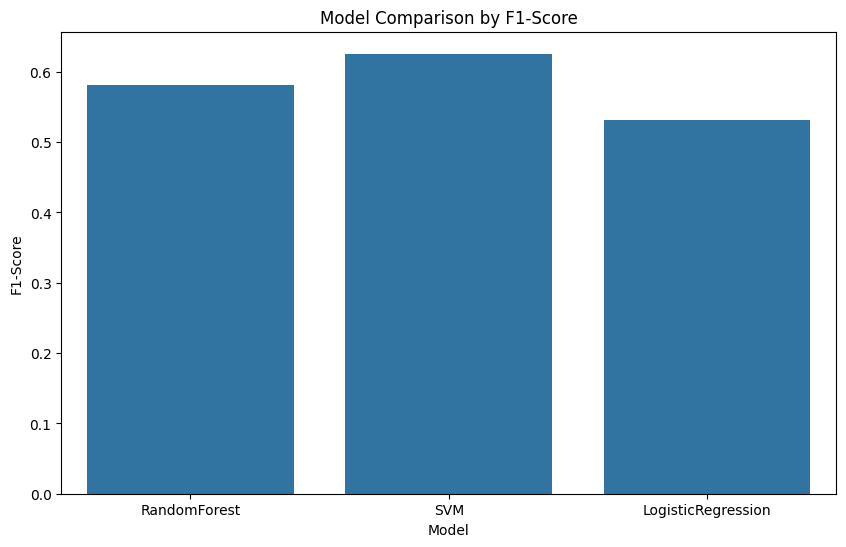


Cross-Validation F1-Scores for SVM: [0.52873563 0.53333333 0.47272727 0.56969697 0.48192771]
Mean CV F1-Score: 0.5173


In [60]:
# Visualize comparison (bar plot for F1-Score)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=comparison_df)
plt.title('Model Comparison by F1-Score')
plt.ylabel('F1-Score')
plt.show()

# Optional: Cross-validation scores for the best model (e.g., RandomForest)
best_model_name = max(results, key=lambda x: results[x]['f1'])  # Select based on F1
best_model = models[best_model_name]['model'].set_params(**results[best_model_name]['best_params'])
cv_scores = cross_val_score(best_model, X_selected, y, cv=5, scoring='f1')
print(f"\nCross-Validation F1-Scores for {best_model_name}: {cv_scores}")
print(f"Mean CV F1-Score: {cv_scores.mean():.4f}")

In [61]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Selection
# We'll use two methods: univariate selection (ANOVA F-test) and recursive feature elimination (RFE) with RandomForest

# 1.1 Univariate feature selection: Select top k features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=100)  # Select top 100 features (adjust k as needed)
X_selected_uni = selector.fit_transform(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()
print(f"Selected {len(selected_features_uni)} features using ANOVA F-test: {selected_features_uni}")

# 1.2 RFE with RandomForest
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=100, step=0.1)  # Select top 100 features
X_selected_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_].tolist()
print(f"Selected {len(selected_features_rfe)} features using RFE: {selected_features_rfe}")

# For simplicity, we'll proceed with  X_selected_rfe

X_selected = X_selected_rfe

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Building and Hyperparameter Tuning
# We'll tune and compare three models: RandomForest, SVM, LogisticRegression

# Define models and parameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    }
}

# Dictionary to store results
results = {}

# Hyperparameter tuning with GridSearchCV and 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                               cv=cv, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'classification_report': classification_report(y_test, y_pred)
    }

# Step 4: Evaluation and Comparison
# Print results for each model
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else "ROC-AUC: N/A")
    print("Classification Report:")
    print(metrics['classification_report'])

# Compare models in a DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results],
    'ROC-AUC': [results[name]['roc_auc'] if results[name]['roc_auc'] is not None else 'N/A' for name in results]
})

print("\nModel Comparison:")
print(comparison_df)


Selected 100 features using ANOVA F-test: ['Bacteroides sp900761785', 'MGYG000001977', 'Bacteroides bouchesdurhonensis', 'Bacteroides sp900547205', 'Bacteroides oleiciplenus', 'Bacteroides intestinalis', 'Bacteroides sp900556215', 'MGYG000004876', 'MGYG000001780', 'Bacteroides togonis', 'MGYG000004188', 'Phocaeicola mediterraneensis', 'Phocaeicola sp900546355', 'Prevotella sp000436595', 'Parabacteroides sp900760525', 'Parabacteroides sp900548175', 'Parabacteroides sp900540715', 'UBA1232 sp900544815', 'Gemmiger variabilis', 'Gemmiger sp900539695', 'Angelakisella sp900547385', 'CAG-217 sp000436335', 'CAG-177 sp003514385', 'Dysosmobacter welbionis', 'Dysosmobacter sp014297375', 'Dysosmobacter sp900752075', 'MGYG000002229', 'Lawsonibacter sp902363045', 'Lawsonibacter sp900066825', 'Lawsonibacter sp900066645', 'Lawsonibacter asaccharolyticus', 'Lawsonibacter sp900754605', 'Lawsonibacter sp900764755', 'Intestinimonas massiliensis', 'CAG-83 sp900555735', 'CAG-83 sp000435555', 'CAG-83 sp900548

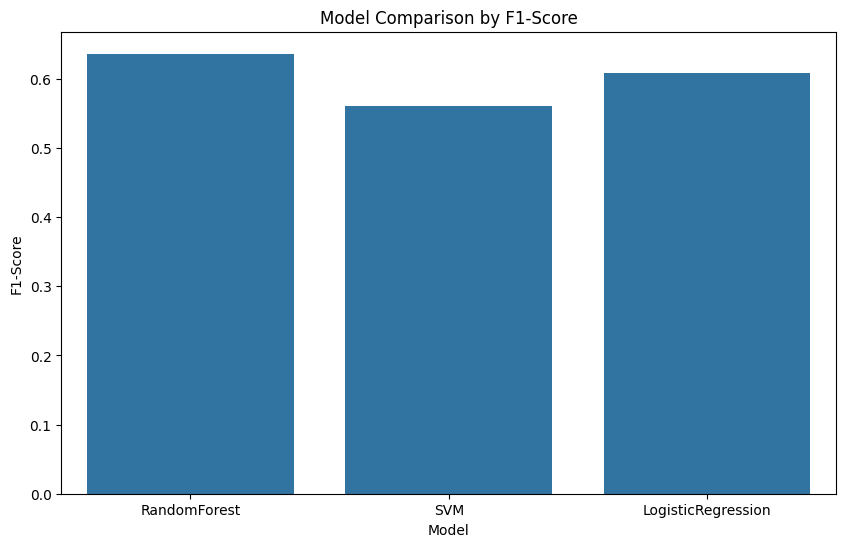

In [66]:
# Visualize comparison (bar plot for F1-Score)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=comparison_df)
plt.title('Model Comparison by F1-Score')
plt.ylabel('F1-Score')
plt.show()



# RandomizedSearchCV

In [68]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint# Import randint to generate random integers (used in hyperparameter search)
from sklearn.datasets import make_classification # Import make_classification to generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Generate a synthetic dataset for classification
# - n_samples=1000: Generate 1000 samples
# - n_features=20: Each sample has 20 features
# - n_informative=10: 10 of the features are informative for the classification task
# - n_classes=2: Binary classification problem (classes 0 and 1)

# Define the hyperparameter search space for RandomizedSearchCV
param_dist = {
    "max_depth": [3, None],                    #  restrict max depth to 3 or allow unlimited depth
    "max_features": randint(1, 9),            # Random integer from 1 to 8 for max number of features considered at each split
    "min_samples_leaf": randint(1, 9),        # Random integer from 1 to 8 for minimum number of samples required at a leaf node
    "criterion": ["gini", "entropy"]          # Two criteria to measure the quality of a split
}

# Initialize a basic Decision Tree classifier
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Initialize RandomizedSearchCV
# - tree: the model to tune
# - param_dist: dictionary of hyperparameter distributions to sample from
# - cv=5: Perform 5-fold cross-validation
tree_cv.fit(X, y)
# Fit the RandomizedSearchCV on the generated dataset (X: features, y: labels)

# Print the best hyperparameters found during the randomized search
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

# Print the best cross-validation score achieved with the best hyperparameters
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.829


# GridSearchCV

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Generate a synthetic classification dataset
# - n_samples=1000: Generate 1000 samples
# - n_features=20: Each sample has 20 features
# - n_informative=10: 10 of the features are informative for classification
# - n_classes=2: Binary classification task
c_space = np.logspace(-5, 8, 15)
# Create a logarithmically spaced array of 15 values for the regularization parameter 'C'
# - From 10^-5 to 10^8
param_grid = {'C': c_space}
# Define the hyperparameter grid to search over
# 'C' controls regularization strength in Logistic Regression (smaller 'C' means stronger regularization)
logreg = LogisticRegression()
# Initialize the Logistic Regression model
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# Initialize GridSearchCV to perform exhaustive search over the parameter grid
# - logreg: the Logistic Regression model
# - param_grid: dictionary of hyperparameters to test
# - cv=5: 5-fold cross-validation to evaluate model performance

# Fit the GridSearchCV on the dataset (X: input features, y: target labels)
logreg_cv.fit(X, y)

# Print the best hyperparameter ('C') found by GridSearchCV
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

# Print the best cross-validation accuracy achieved using the best hyperparameter
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': np.float64(0.006105402296585327)}
Best score is 0.853
